In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers,models

In [ ]:
(train_images,train_lables),(test_images,test_lables)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_lables)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_lables)

10000

In [ ]:
train_images=train_images.reshape(60000, 28, 28,1)
test_images=test_images.reshape(10000, 28, 28,1)

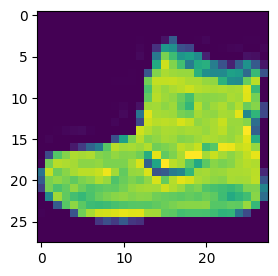

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(train_images[0])
plt.grid=False
plt.show()

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
model=models.Sequential()

In [ ]:
model.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['Accuracy'])

In [ ]:
model.fit(train_images,train_lables,epochs=3,validation_data=(test_images,test_lables),verbose=1)

Epoch 1/3
1875/1875 [==============================] - 86s 45ms/step - loss: 0.4417 - Accuracy: 0.8382 - val_loss: 0.3510 - val_Accuracy: 0.8730
Epoch 2/3
1875/1875 [==============================] - 80s 43ms/step - loss: 0.2937 - Accuracy: 0.8913 - val_loss: 0.2882 - val_Accuracy: 0.8979
Epoch 3/3
1875/1875 [==============================] - 87s 46ms/step - loss: 0.2456 - Accuracy: 0.9090 - val_loss: 0.2665 - val_Accuracy: 0.9020


In [ ]:
loss1,acc1=model.evaluate(train_images,train_lables)
print("training accuracy :",acc1)
loss2,acc2=model.evaluate(test_images,test_lables)
print("testing accuracy :",acc2)

1875/1875 [==============================] - 23s 12ms/step - loss: 0.2062 - Accuracy: 0.9224
training accuracy : 0.9224166870117188
313/313 [==============================] - 4s 13ms/step - loss: 0.2665 - Accuracy: 0.9020
testing accuracy : 0.9020000100135803


In [ ]:
predictions=model.predict(test_images)

313/313 [==============================] - 4s 12ms/step


In [ ]:
index=80
label=np.argmax(predictions[index])
label

1

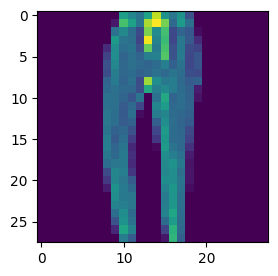

In [ ]:
plt.figure(figsize=(3,3))
plt.imshow(test_images[index])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              